# Palmer Penguins Data Analysis

This notebook demonstrates data analysis using the Palmer Penguins dataset.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Shuyi-Song/data-analysis-template/blob/main/notebooks/penguins_analysis.ipynb)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

## Load and Explore Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# Load the penguins dataset
df = pd.read_csv('../data/raw/penguins.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/penguins.csv'

## Data Visualization

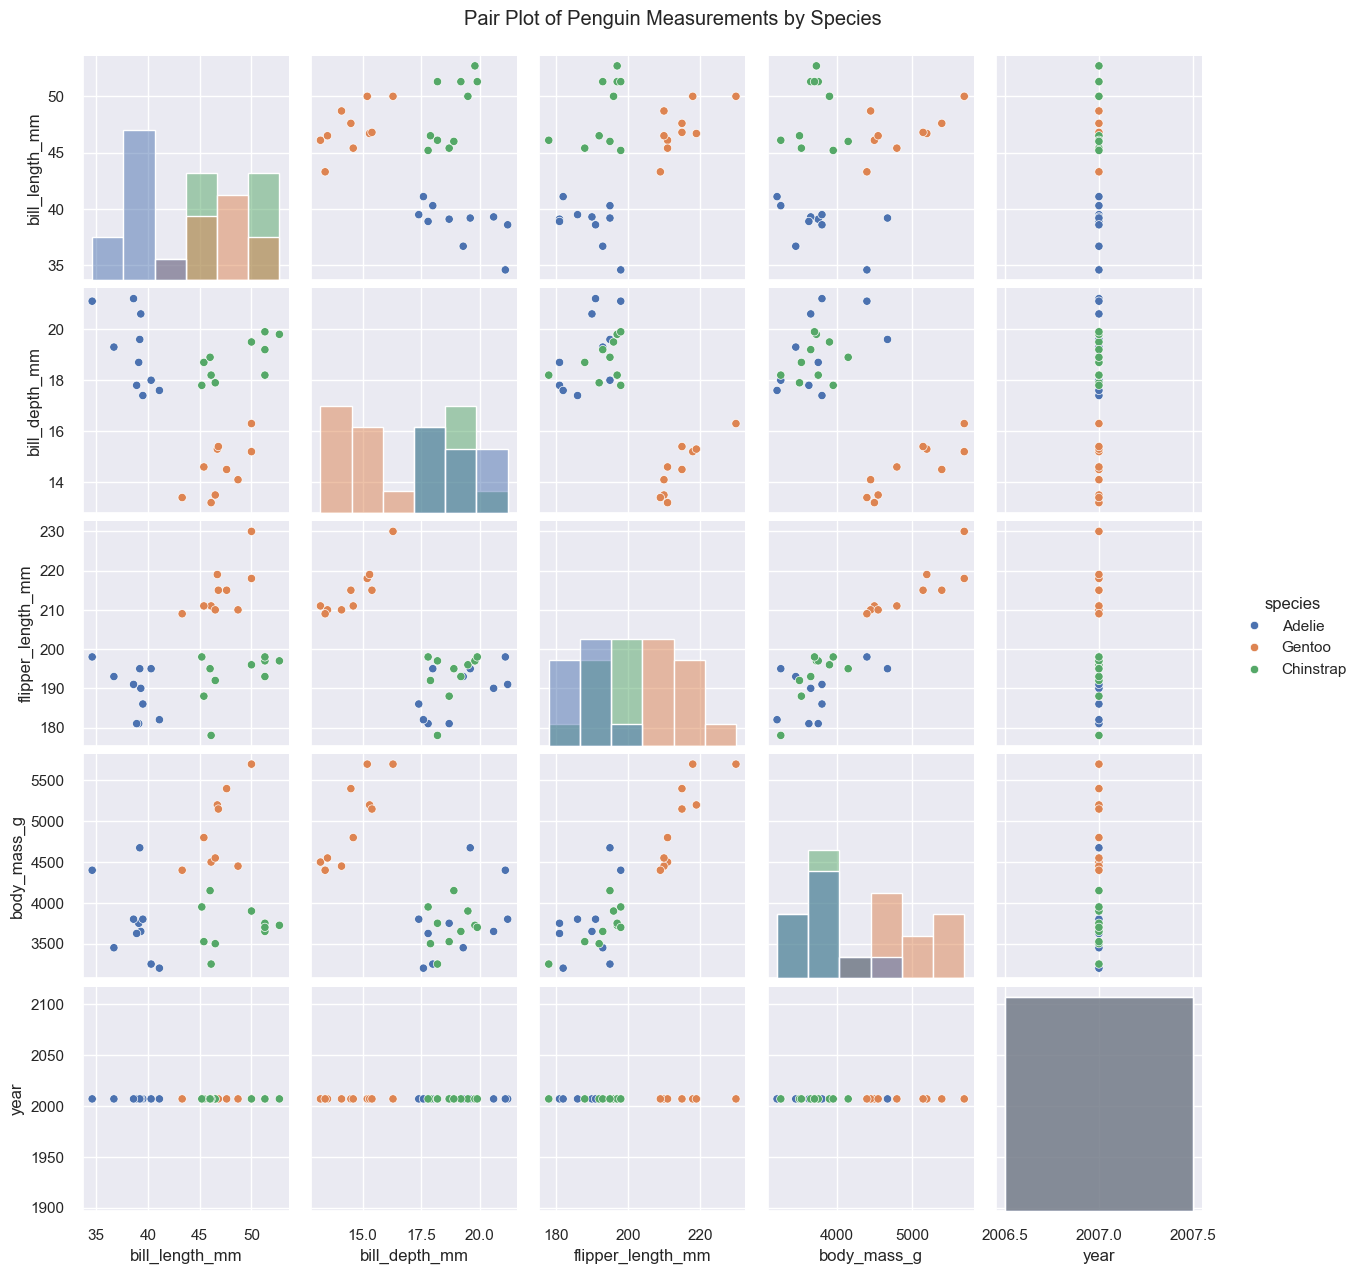

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [ ]:
# Set the style for all plots
plt.style.use('seaborn-v0_8')  # Use a specific seaborn style version
# Alternatively, you can use any of these styles:
# plt.style.use('seaborn-v0_8-darkgrid')
# plt.style.use('seaborn-v0_8-whitegrid')
# or simply use the default style:
# plt.style.use('default')

# Create a pair plot to visualize relationships between features
sns.set_theme()  # This sets up seaborn's default theme
sns.pairplot(df, hue='species', diag_kind='hist')
plt.suptitle('Pair Plot of Penguin Measurements by Species', y=1.02)
plt.show()# Set the style for all plots
plt.style.use('seaborn')

# Create a pair plot to visualize relationships between features
sns.pairplot(df, hue='species', diag_kind='hist')
plt.suptitle('Pair Plot of Penguin Measurements by Species', y=1.02)
plt.show()

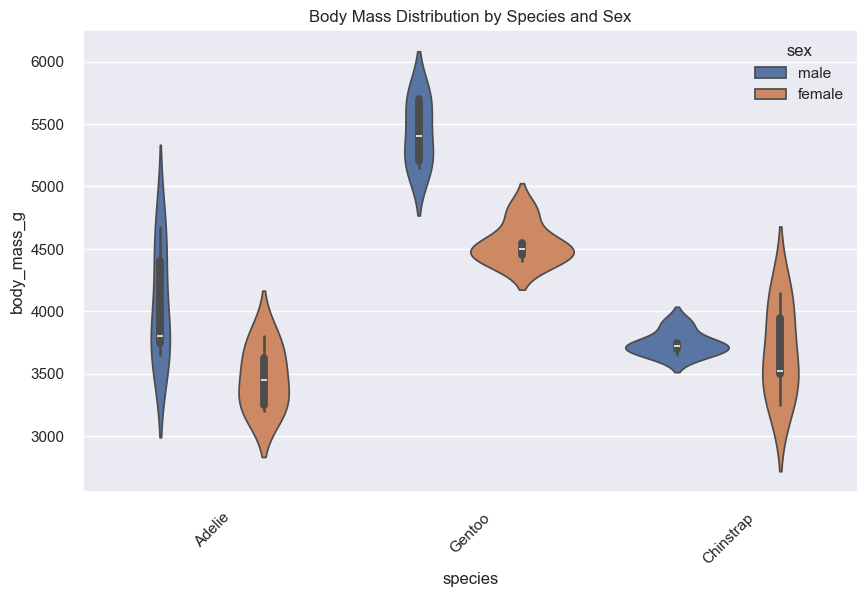

In [ ]:
# Create a violin plot for body mass by species and sex
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='species', y='body_mass_g', hue='sex')
plt.title('Body Mass Distribution by Species and Sex')
plt.xticks(rotation=45)
plt.show()

## Machine Learning: Species Classification

In [ ]:
# Prepare data for modeling
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[features]
y = df['species']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Print the model accuracy
print(f"Training accuracy: {rf.score(X_train_scaled, y_train):.3f}")
print(f"Testing accuracy: {rf.score(X_test_scaled, y_test):.3f}")

Training accuracy: 1.000
Testing accuracy: 1.000


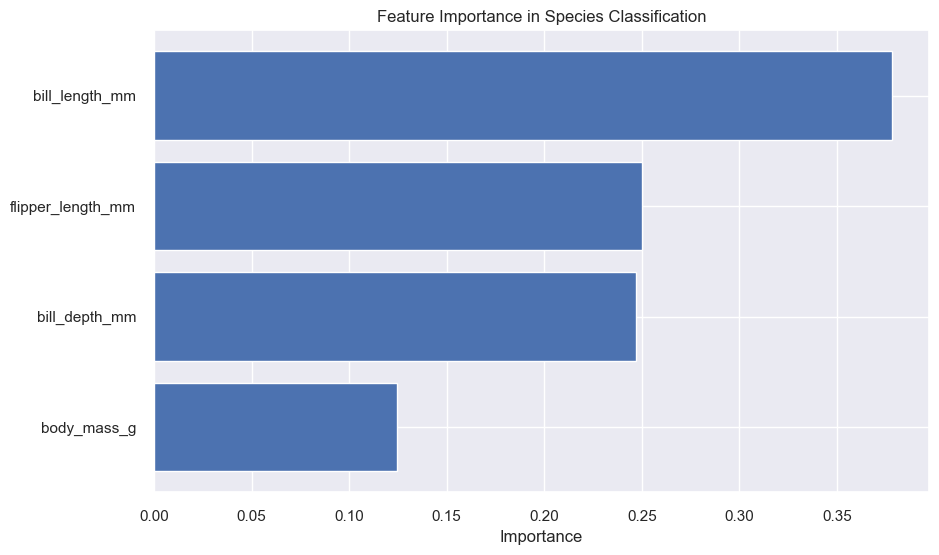

In [ ]:
# Feature importance plot
importance = pd.DataFrame({
    'feature': features,
    'importance': rf.feature_importances_
})
importance = importance.sort_values('importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance['feature'], importance['importance'])
plt.title('Feature Importance in Species Classification')
plt.xlabel('Importance')
plt.show()